In [1]:
%pylab inline
import matplotlib.pyplot as plt
import pandas as pd
import os

PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
PATH_TO_DATA += "data/12-months/"
df = pd.read_csv(PATH_TO_DATA + "Binance_BTCUSDT_1h_1 Mar, 2018-1 Mar, 2019.csv", sep='\t')
print(df.shape)
df.head()

Populating the interactive namespace from numpy and matplotlib
(8733, 7)


,open time,open,high,low,close,volume,number of trades
0,2018-03-01 00:00:00,10325.64,10421.00,10240.00,10410.00,1500.3,13072
1,2018-03-01 01:00:00,10407.00,10420.00,10319.22,10418.00,804.1,7387
2,2018-03-01 02:00:00,10420.00,10464.99,10288.30,10331.00,932.0,8417
3,2018-03-01 03:00:00,10331.89,10394.41,10291.00,10356.03,665.4,6851
4,2018-03-01 04:00:00,10356.01,10490.00,10356.00,10440.73,912.6,9139


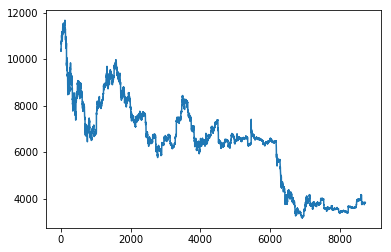

In [2]:
price = df['close'].values
plt.plot(range(len(price)), price)

In [3]:
from talib import EMA, RSI, CDLDOJI, CDL2CROWS

In [4]:
def macd_strategy(df, 
    fast_h=13, slow_h=26, 
    start_balance=1000, fee=0.1):

    price = df['close'].values
    MACD = EMA(price, timeperiod=fast_h) - EMA(price, timeperiod=slow_h)

    balance = np.ones(len(price))
    balance[0] = start_balance
    hold  = 0

    for i in range(1, len(price)):  
        if hold == 0:
            if (MACD[i] > 0 and MACD[i-1] < 0): #buy condition
                hold = balance[i-1] / price[i] * (1.0 - fee/100.0)
            balance[i] = balance[i-1]
        else:
            balance[i] = hold * price[i] * (1.0 - fee/100.0)
            if (MACD[i] < 0 and MACD[i-1] > 0): #sell condition
                hold = 0

    return balance

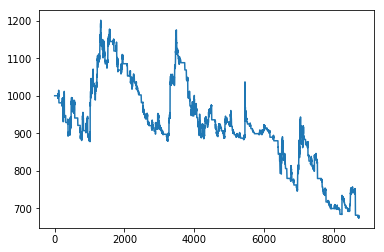

In [5]:
balance = macd_strategy(df, 13, 25)
plt.plot(range(len(balance)), balance)

In [6]:
def rsi_strategy(df, timeperiod=14, 
    start_balance=1000, fee=0.1):

    price = df['close'].values
    rsi = RSI(price, timeperiod=timeperiod)

    balance = np.ones(len(price))
    balance[0] = start_balance
    hold  = 0

    for i in range(1, len(price)):  
        if hold == 0:
            if (rsi[i] < 15): #buy condition
                hold = balance[i-1] / price[i] * (1.0 - fee/100.0)
            balance[i] = balance[i-1]
        else:
            balance[i] = hold * price[i] * (1.0 - fee/100.0)
            if (rsi[i] > 80): #sell condition
                hold = 0

    return balance

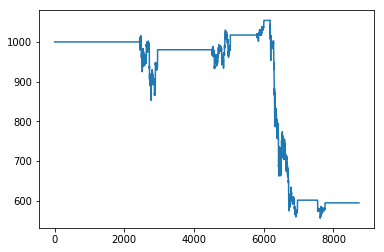

In [7]:
balance = rsi_strategy(df)
plt.plot(range(len(balance)), balance)

In [8]:
PATH_TO_DATA = os.getcwd()
PATH_TO_DATA = PATH_TO_DATA[:-PATH_TO_DATA[::-1].find("/")]
PATH_TO_DATA += "data/shares/"
df = pd.read_csv(PATH_TO_DATA + "NVDA.csv", sep=',')
print(df.shape)
df = df[10000:30000]
df.head()

(52845, 6)


,dt,open,high,low,close,volume
10000,2011-07-13 16:00:00,14.64,14.70,14.61,14.6500,15476066
10001,2011-07-14 09:45:00,14.72,14.79,14.56,14.7200,1379838
10002,2011-07-14 10:00:00,14.72,14.81,14.65,14.7700,3202128
10003,2011-07-14 10:15:00,14.78,14.78,14.68,14.7013,4284890
10004,2011-07-14 10:30:00,14.71,14.75,14.66,14.6888,4842564


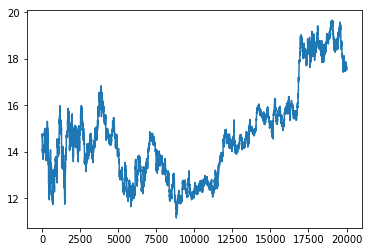

In [9]:
price = df['close'].values
plt.plot(range(len(price)), price)

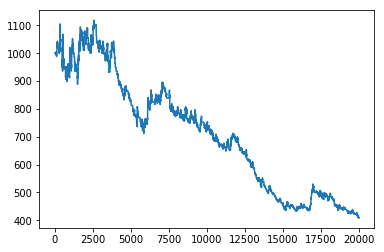

In [10]:
balance = macd_strategy(df, 13, 25)
plt.plot(range(len(balance)), balance)

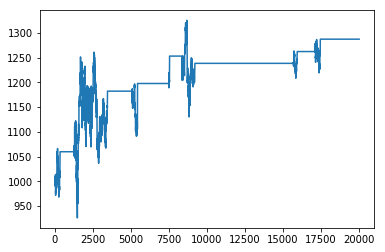

In [11]:
balance = rsi_strategy(df)
plt.plot(range(len(balance)), balance)

In [12]:
integer = CDL2CROWS(df['open'], df['high'], df['low'], df['close'])

In [13]:
sum(integer)

0